In [1]:
# Tests Variance of All Rooms
import pip
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# make data frame
df = pd.read_csv('GenRooms.csv')
#print(df['RoomType'])


import seaborn as sns 
  
# generating correlation heatmap 
#sns.heatmap(zoo_data.corr(), annot = True) 
  
# posting correlation heatmap to output console  
#plt.show() 



In [2]:
#df.var(axis=1)
roomType = df['RoomType']

In [3]:
#clustering
from pylab import rcParams
#sklearn 
import sklearn
from sklearn.cluster import KMeans 
from sklearn.preprocessing import scale # for scaling the data
import sklearn.metrics as sm # for evaluating the model
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report

del df['RoomType']
data = df
var_names = df.columns.values


In [4]:
print(var_names)

['accordion' 'air_conditioner' 'air_conditioner_1' ... 'xbox_3' 'xbox_4'
 'xbox_5']


In [5]:
clusters = 73
kmeans = KMeans(n_clusters=clusters,random_state=5)

#fit the dataset
kmeans.fit(data)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=73, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [6]:
print(kmeans.labels_)
print(kmeans.inertia_)

[13  6  7 ...  7  7 66]
326404.3776927369


In [7]:
from sklearn.decomposition import PCA
pca = PCA(3) 
pca.fit(data) 
  
pca_data = pd.DataFrame(pca.transform(data)) 
  
print(pca_data.head())

          0         1         2
0  3.948251 -1.163012  0.599671
1 -1.172738  0.463937 -0.295188
2 -1.168581  0.400896 -0.271336
3  2.848152  0.337925 -1.607248
4 -0.718938 -0.048508 -0.142944


In [8]:

from matplotlib import colors as mcolors 
import math 
   
''' Generating different colors in ascending order  
                                of their hsv values '''
colors = list(zip(*sorted(( 
                    tuple(mcolors.rgb_to_hsv( 
                          mcolors.to_rgba(color)[:3])), name) 
                     for name, color in dict( 
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                      ).items())))[1] 
   
   
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/clusters) 
cluster_colors = colors[5 : -5 : skips] 


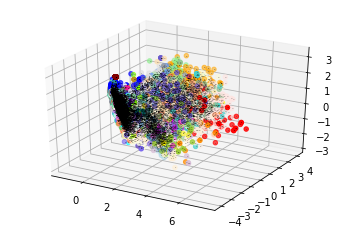

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
   
fig = plt.figure() 
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans.labels_))) 
   
str_labels = list(map(lambda label:'% s' % label, kmeans.labels_)) 
   
list(map(lambda data1, data2, data3, str_label: 
        ax.text(data1, data2, data3, s = str_label, size = 0.5, 
        zorder = 20, color = 'k'), pca_data[0], pca_data[1], 
        pca_data[2], str_labels)) 

plt.show()